In [12]:
import networkx as nx
import random
%matplotlib inline
G = nx.Graph()
G.add_nodes_from([5,6,7])
G.add_edges_from([(7,1),(6,7),(1,5)])

## Edge attributes

You might have noticed that each edge is in fact a dictionary:

In [13]:
G[1]   #Each node is a dictionary key. The value is another dictionary: whose keys are all the nodes it is connected to

{5: {}, 7: {}}

In [14]:
G[1][5]  #There's an empty dictionary corresponding to every edge

{}

And one can store values in that, for example, edge weights:

In [15]:
G[1][5]['weight']=5

In [16]:
for u,v in G.edges():
    G[u][v]['weight']=random.randint(1,5)

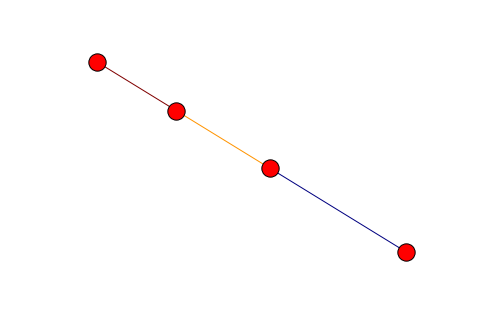

In [17]:
nx.draw(G,edge_color=[G[u][v]['weight'] for u,v in G.edges()])

In [18]:
G.edges(data=1)

[(1, 5, None), (1, 7, None), (6, 7, None)]

## Node attributes

In [19]:
G.node[5]

{}

In [20]:
G.node[1]['size']=800
G.node[7]['size']=700
G.node[6]['size']=400
G.node[5]['size']=300

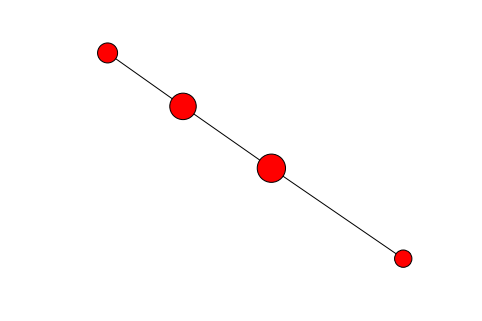

In [21]:
nx.draw(G, node_size=[G.node[n]['size'] for n in G.nodes()])

## Shortest paths

In [22]:
AG=nx.read_gpickle("../data/smaller_airportnet.pickle")
nx.draw(AG, pos=nx.layout.circular_layout(AG))

FileNotFoundError: [Errno 2] No such file or directory: '../data/smaller_airportnet.pickle'

In [ ]:
AG.edges(data=True)

In [ ]:
nx.shortest_path_length(AG, 'YYZ', 'ADD')

In [ ]:
[p for p in nx.shortest_paths.all_shortest_paths(AG,'YYZ', 'ADD')]

##### By default, networkx doesn't look at edge weights when calculating shortest paths

In [ ]:
nx.shortest_path_length(AG, 'YYZ', 'ADD', weight='weight')

In [ ]:
[p for p in nx.shortest_paths.all_shortest_paths(AG,'YYZ', 'ADD', weight='weight')]

## Cycles

In [ ]:
nx.cycle_basis(AG)

## Reading/writing graphs

Networkx supports reading and writing graphs in various formats:



In [ ]:
nx.write_edgelist(G, 'test_graph.edgelist')

In [ ]:
cat test_graph.edgelist

In [ ]:
nx.write_graphml(G, 'test_graph.graphml')

In [ ]:
cat test_graph.graphml

In [ ]:
H=nx.read_graphml("test_graph.graphml")

In [ ]:
H.nodes()

By default, networkx reads node labe;ls as strings, but it's easy to override:

In [ ]:
H=nx.read_graphml("test_graph.graphml", node_type=int)

In [ ]:
H.nodes()

##### Our recommendation: gpickle

In [ ]:
nx.write_gpickle(G, "test_graph.gpickle")

In [ ]:
H=nx.read_gpickle("test_graph.gpickle")

In [ ]:
H.nodes()